In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy

# Import the requests library.
import requests
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [4]:
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
#Starting URL for Weather Map API Call.  Three unit options: standard, metric, and imperial
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city ='London'

In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + city

In [6]:
weather_response = requests.get(city_url)
weather_json = weather_response.json()

In [7]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [8]:
weather_json.get('main')

{'temp': 41.76,
 'feels_like': 35.24,
 'temp_min': 38.05,
 'temp_max': 44.15,
 'pressure': 1021,
 'humidity': 69}

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
# Get the JSON data.
boston_data = city_weather.json()

In [12]:
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 43.54,
  'feels_like': 36.97,
  'temp_min': 40.37,
  'temp_max': 45.99,
  'pressure': 1008,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 13, 'deg': 0, 'gust': 0},
 'rain': {'1h': 0.16},
 'clouds': {'all': 100},
 'dt': 1649028859,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648981388,
  'sunset': 1649027491},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
boston_data['sys']['country']

'US'

In [14]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 45.99 79 100 13


In [15]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 4, 3, 23, 34, 19)

In [16]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-03 23:34:19'

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | phu ly
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | beaupre
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | rodrigues alves
Processing Record 9 of Set 1 | samana
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | lavrentiya
Processing Record 13 of Set 1 | hanzhong
Processing Record 14 of Set 1 | mitchell
Processing Record 15 of Set 1 | trairi
Processing Record 16 of Set 1 | abha
Processing Record 17 of Set 1 | halalo
City not found. Skipping...
Processing Record 18 of Set 1 | iskilip
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 |

Processing Record 37 of Set 4 | cayenne
Processing Record 38 of Set 4 | nome
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | chumphon
Processing Record 41 of Set 4 | nisia floresta
Processing Record 42 of Set 4 | okhotsk
Processing Record 43 of Set 4 | la paz
Processing Record 44 of Set 4 | shenjiamen
Processing Record 45 of Set 4 | kourou
Processing Record 46 of Set 4 | hachinohe
Processing Record 47 of Set 4 | argentan
Processing Record 48 of Set 4 | sturgeon falls
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | lagoa
Processing Record 1 of Set 5 | nanakuli
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | new ulm
Processing Record 5 of Set 5 | gidole
Processing Record 6 of Set 5 | yakeshi
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | panorama
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | hasaki
Processing Recor

Processing Record 26 of Set 8 | margate
Processing Record 27 of Set 8 | marcona
City not found. Skipping...
Processing Record 28 of Set 8 | mollendo
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | mentok
City not found. Skipping...
Processing Record 31 of Set 8 | shellbrook
Processing Record 32 of Set 8 | xuanhua
Processing Record 33 of Set 8 | kirksville
Processing Record 34 of Set 8 | rawalpindi
Processing Record 35 of Set 8 | balkanabat
Processing Record 36 of Set 8 | filingue
Processing Record 37 of Set 8 | tabou
Processing Record 38 of Set 8 | touros
Processing Record 39 of Set 8 | kijang
Processing Record 40 of Set 8 | tra vinh
Processing Record 41 of Set 8 | mildura
Processing Record 42 of Set 8 | shentala
Processing Record 43 of Set 8 | zhangjiakou
Processing Record 44 of Set 8 | kyaikkami
Processing Record 45 of Set 8 | charkhi dadri
Processing Record 46 of Set 8 | koupela
Processing Record 47 of Set 8 | santa rosa
Processing Record 48 of Set 8 | nizhn

Processing Record 14 of Set 12 | victor harbor
Processing Record 15 of Set 12 | bairiki
Processing Record 16 of Set 12 | athabasca
Processing Record 17 of Set 12 | bonavista
Processing Record 18 of Set 12 | westport
Processing Record 19 of Set 12 | kemijarvi
Processing Record 20 of Set 12 | suifenhe
Processing Record 21 of Set 12 | fare
Processing Record 22 of Set 12 | kibala
Processing Record 23 of Set 12 | port lincoln
Processing Record 24 of Set 12 | lata
Processing Record 25 of Set 12 | vanimo
Processing Record 26 of Set 12 | goma
Processing Record 27 of Set 12 | batemans bay
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | erice
Processing Record 30 of Set 12 | billings
Processing Record 31 of Set 12 | christchurch
Processing Record 32 of Set 12 | yar-sale
Processing Record 33 of Set 12 | rocha
Processing Record 34 of Set 12 | kerema
Processing Record 35 of Set 12 | tigil
Processing Record 36 of Set 12 | rondonopolis
Processing Record 37 of Set 12 | anadyr
Pr

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,-29.33,100,98,1.86,RU,2022-04-03 23:45:46
1,Hobart,-42.8794,147.3294,61.27,87,75,10.36,AU,2022-04-03 23:37:37
2,Phu Ly,20.5411,105.9139,62.94,68,34,2.06,VN,2022-04-03 23:45:47
3,Castro,-24.7911,-50.0119,62.96,95,84,5.01,BR,2022-04-03 23:42:49
4,Cape Town,-33.9258,18.4232,62.11,90,20,5.99,ZA,2022-04-03 23:38:06
5,Beaupre,47.0443,-70.8953,41.81,80,100,1.14,CA,2022-04-03 23:45:35
6,Tasiilaq,65.6145,-37.6368,23.16,94,96,7.45,GL,2022-04-03 23:39:35
7,Rodrigues Alves,-7.7380,-72.6509,77.20,86,77,2.98,BR,2022-04-03 23:45:48
8,Samana,19.2056,-69.3369,80.56,84,70,6.60,DO,2022-04-03 23:45:48
9,Hermanus,-34.4187,19.2345,57.79,90,20,4.54,ZA,2022-04-03 23:39:39


In [21]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-04-03 23:45:46,71.9667,102.5000,-29.33,100,98,1.86
1,Hobart,AU,2022-04-03 23:37:37,-42.8794,147.3294,61.27,87,75,10.36
2,Phu Ly,VN,2022-04-03 23:45:47,20.5411,105.9139,62.94,68,34,2.06
3,Castro,BR,2022-04-03 23:42:49,-24.7911,-50.0119,62.96,95,84,5.01
4,Cape Town,ZA,2022-04-03 23:38:06,-33.9258,18.4232,62.11,90,20,5.99
5,Beaupre,CA,2022-04-03 23:45:35,47.0443,-70.8953,41.81,80,100,1.14
6,Tasiilaq,GL,2022-04-03 23:39:35,65.6145,-37.6368,23.16,94,96,7.45
7,Rodrigues Alves,BR,2022-04-03 23:45:48,-7.7380,-72.6509,77.20,86,77,2.98
8,Samana,DO,2022-04-03 23:45:48,19.2056,-69.3369,80.56,84,70,6.60
9,Hermanus,ZA,2022-04-03 23:39:39,-34.4187,19.2345,57.79,90,20,4.54


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV. idex 1 ~ file size titie = City_ID
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
datetime.utcfromtimestamp(today).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-04 00:18:14'

In [28]:
time.strftime('%x')

'04/03/22'

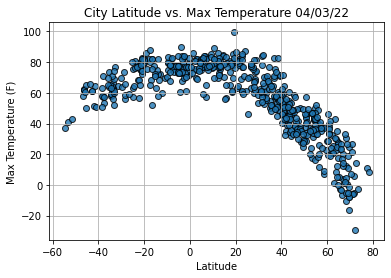

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

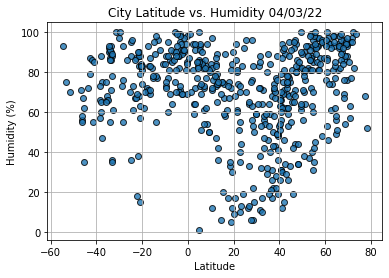

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

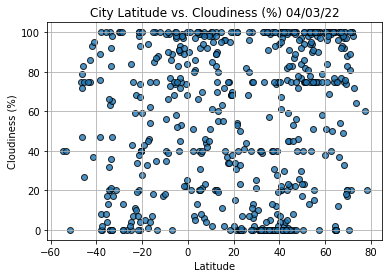

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

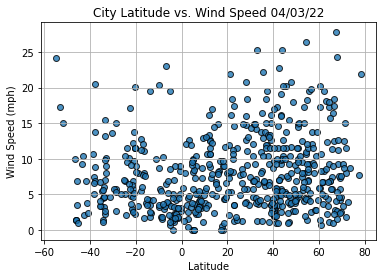

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()